In [2]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


In [16]:
?MiniSom

/home/max/.local/opt/miniconda3/envs/ml/lib/python3.8/site-packages/minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


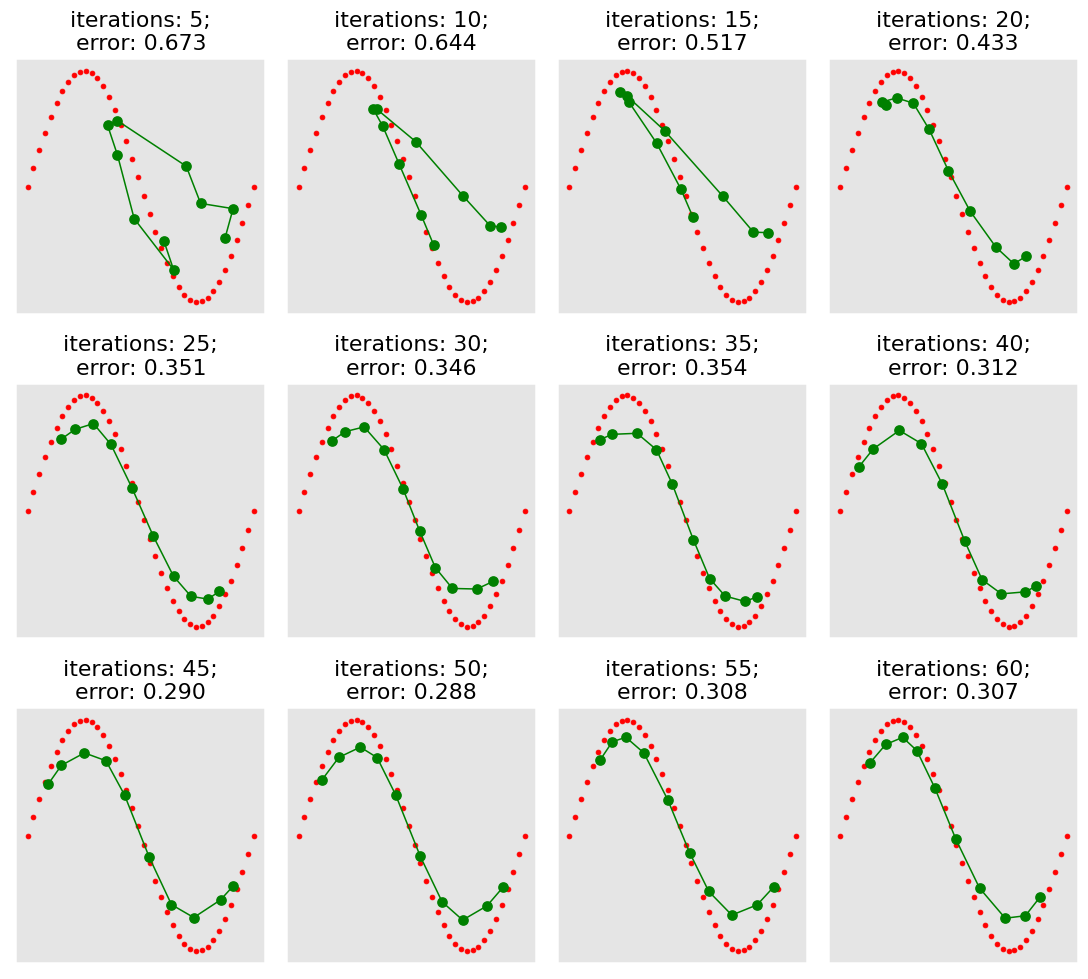

In [90]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

N_points = 40
N_neurons = 10
t = np.linspace(0, np.pi * 2, N_points)
x = t
np.random.shuffle(x)
y = np.sin(t)

som = MiniSom(1, N_neurons, 2, sigma=3, learning_rate=0.8, neighborhood_function='gaussian', random_seed=0)
points = np.array([x, y]).T
som.random_weights_init(points)

plt.figure(figsize=(10, 9))
for i, iterations in enumerate(range(5, 61, 5)):
    som.train(points, iterations, verbose=False, random_order=False)
    plt.subplot(3, 4, i + 1)
    plt.scatter(x, y, color='red', s=10)
    # print(som.get_weights())
    plt.plot(som.get_weights()[0][:, 0], som.get_weights()[0][:, 1], 'green', marker='o')
    plt.title("iterations: {i};\nerror: {e:.3f}".format(i=iterations, e=som.quantization_error(points)))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()